In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import skew
from scipy.stats.mstats import winsorize

%matplotlib inline

In [ ]:
# Cargo el CSV
df = pd.read_csv("HousingData.csv")

""" Nombres de las columnas:

CRIM - Tasa de delincuencia per cápita por ciudad.
ZN - Proporción de suelo residencial zonificado para lotes de más de 25 mil pies cuadrados.
INDUS - Proporción de acres comerciales no minoristas por ciudad.
CHAS - Variable ficticia del río Charles (1 si la zona es colindante con el rio, 0 en caso contrario).
NOX - Concentración de óxidos nítricos (Partes por 10 millones).
RM - Número medio de habitaciones por vivienda.
AGE - Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
DIS - Distancias ponderadas a cinco centros de empleo de Boston.
RAD - Índice de accesibilidad a autopistas radiales.
TAX - Tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 $.
PTRATIO - Ratio de alumnos-profesor por ciudad.
B - 1000(Bk - 0.63)^2 donde Bk es la proporción de poblacion negra en la ciudad.
LSTAT - % de población de estatus más bajo.
MEDV - Valor medio de las viviendas ocupadas por sus propietarios en miles de $.

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html#:~:text=The%20Boston%20Housing%20Dataset,the%20area%20of%20Boston%20Mass


Nuestra variable dependiente va a ser MEDV, por que el objetivo es predecir el valor medio de las viviendas. 
"""
# Muestro las primeras 5 filas del dataset
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [ ]:
# Recojo información acerca del dataset
df.info()

# Todas las columnas son de tipo numérico, por lo que no hace falta usar definir variables categóricas

# Recojo información sobre la media, desviación estándar, etc.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [ ]:
# ¿Hay valores faltantes / nulos en el dataset?
print(f"Numero de valores faltantes:\n{df.isna().sum()}\n")

# ¿Hay duplicados en el dataset?
print(f"Numero de duplicados: {df.duplicated().sum()}")

# Hay 20 valores faltantes en: CRIM, ZN, INDUS, CHAS Y AGE
# Quito los valores faltantes

df_dropped=df.dropna()

df_dropped.head()

Numero de valores faltantes:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Numero de duplicados: 0


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
5  394.12   5.21  28.7

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.188075  0.391552 -0.051970  0.416160 -0.227170  0.341311   
ZN      -0.188075  1.000000 -0.521256 -0.033357 -0.515660  0.343210 -0.568174   
INDUS    0.391552 -0.521256  1.000000  0.049820  0.762737 -0.403068  0.642387   
CHAS    -0.051970 -0.033357  0.049820  1.000000  0.076661  0.095308  0.072644   
NOX      0.416160 -0.515660  0.762737  0.076661  1.000000 -0.316563  0.732540   
RM      -0.227170  0.343210 -0.403068  0.095308 -0.316563  1.000000 -0.248670   
AGE      0.341311 -0.568174  0.642387  0.072644  0.732540 -0.248670  1.000000   
DIS     -0.365052  0.645359 -0.696569 -0.095037 -0.768137  0.218713 -0.753547   
RAD      0.608667 -0.298773  0.591944  0.014102  0.628170 -0.236057  0.443585   
TAX      0.560841 -0.305768  0.734204 -0.026513  0.679824 -0.320561  0.504472   
PTRATIO  0.265428 -0.422164  0.395691 -0.104995  0.210216 -0.390686  0.264968   
B       -0.386254  0.169894 

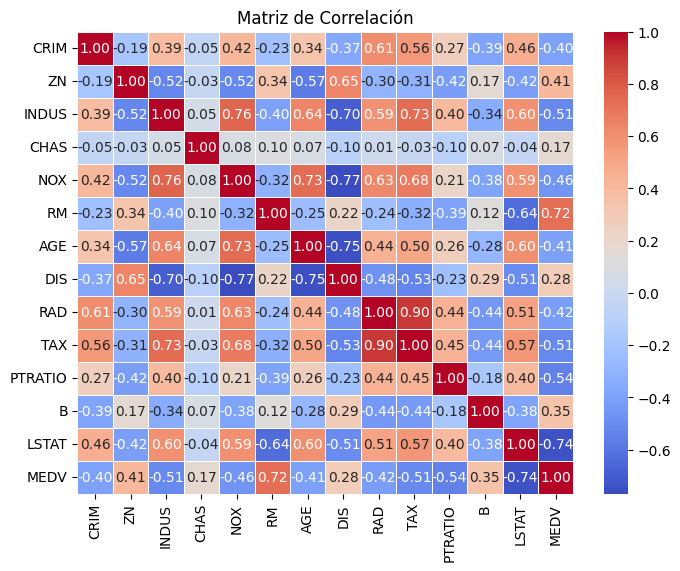

In [53]:
#Matriz de correlacion completa
corr = df_dropped.corr()

print(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show() 

In [ ]:
# PROFILE REPORT

profile = ProfileReport(df_dropped, title="Boston Housing")

profile.to_notebook_iframe() 

' \nprofile = ProfileReport(df_dropped, title="AA")\n\nprofile.to_notebook_iframe() '

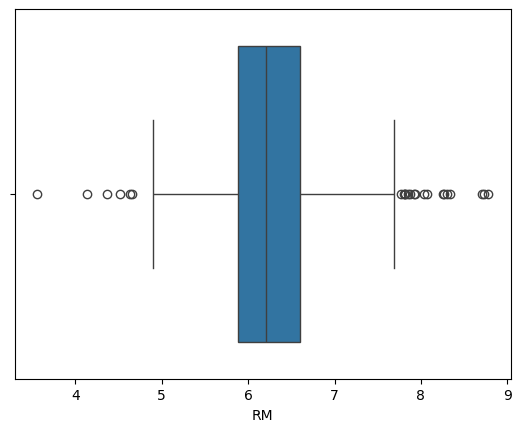

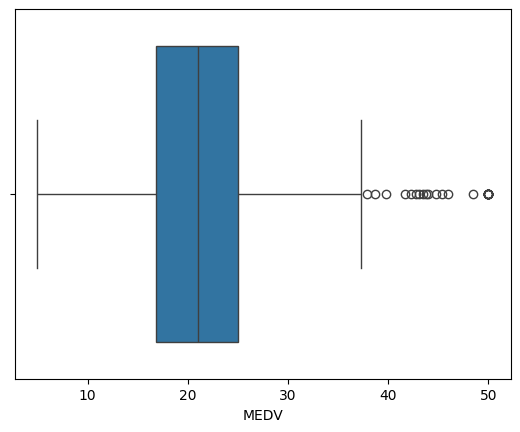

In [ ]:
""" La columna con mas correlacion a MEDV es RM

RM - Número medio de habitaciones por vivienda.

MEDV - Valor medio de las viviendas ocupadas por sus propietarios en miles de $. """

# ¿TIENEN OUTLIERS MEDV Y RM?
sns.boxplot(x=df_dropped["RM"]) 
plt.show() 

sns.boxplot(x=df_dropped["MEDV"]) 
plt.show() 

# Cuentan con outliers, por lo que voy a probar a hacer una winsorizacion para reducir el efecto que puede causar en el modelo



Skew Winsorize MEDV: 0.36983484484369583
Skew MEDV: 1.061883757342733


C:\Users\PC\AppData\Local\Temp\ipykernel_34232\940537261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["log_rm"] =np.log1p(df["RM"])
C:\Users\PC\AppData\Local\Temp\ipykernel_34232\940537261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["winsorize_medv"]  =winsorize(df_dropped["log_rm"],limits=[0.05,0.05])


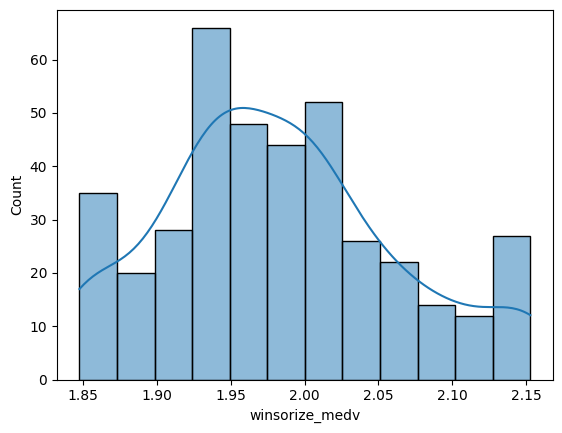

<Axes: xlabel='MEDV', ylabel='Count'>

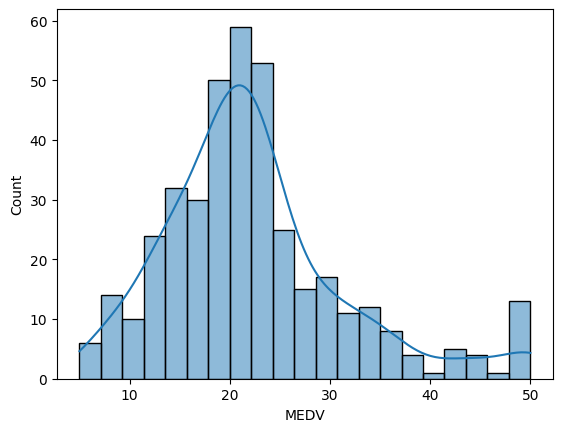

In [ ]:
# Voy a probar tanto con los datos winsorizados como sin winsorizar, ya que puede ser que a pesar de ser outliers, ser explicativos del modelo

# Creo la columna log_rm, que usaremos para la winsorizacion
df_dropped["log_rm"] =np.log1p(df["RM"])

# Creo la columna winsorize_medv con limites de 0.05
df_dropped["winsorize_medv"]  =winsorize(df_dropped["log_rm"],limits=[0.05,0.05])
print(f"Skew Winsorize MEDV: {skew(df_dropped['winsorize_medv'])}")
print(f"Skew MEDV: {skew(df_dropped['MEDV'])}")

sns.histplot(df_dropped["winsorize_medv"],kde=True)
plt.show()

# Ahora los datos sin winsorizar
skew(df_dropped['MEDV']), skew(df_dropped['RM'])

sns.histplot(df_dropped["MEDV"],kde=True)

# En el caso de Winsorize MEDV la asimetría es mucho menor

<Axes: xlabel='log_rm', ylabel='winsorize_medv'>

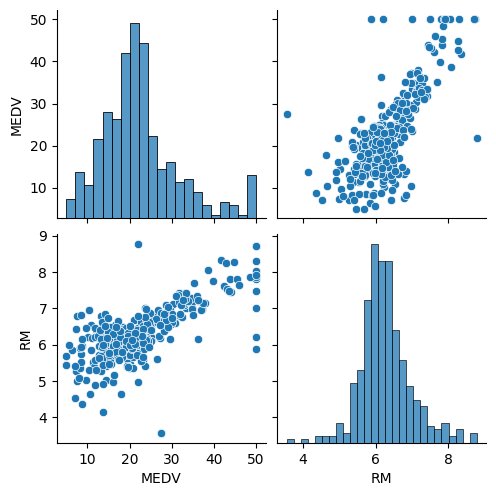

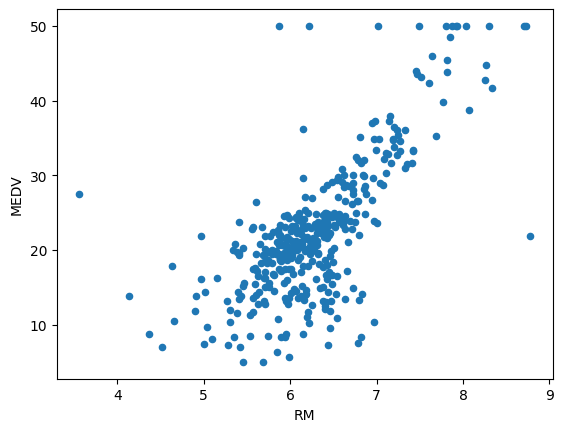

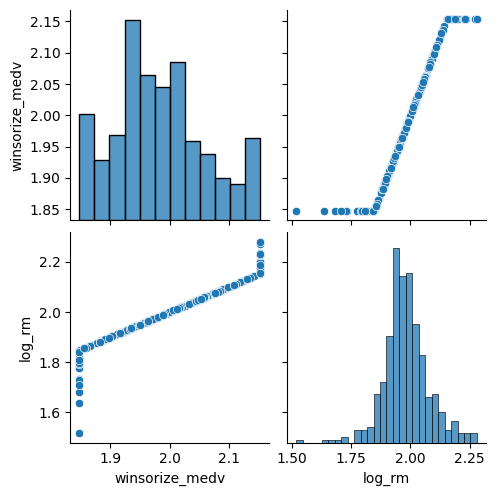

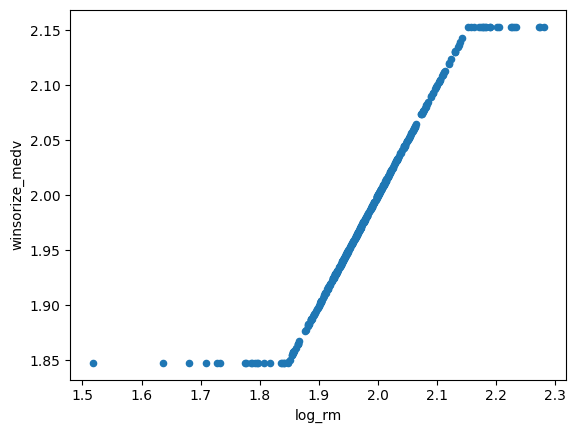

In [64]:
# Ahora voy a ver cuanta linealidad tienen ambas variables, tanto winsorizado como sin winsorizar

sns.pairplot(df_dropped, vars = ["MEDV", "RM"])

df_dropped.plot.scatter("RM", "MEDV")


sns.pairplot(df_dropped, vars = ["winsorize_medv", "log_rm"])

df_dropped.plot.scatter("log_rm", "winsorize_medv")

# En el caso de los datos winsorizados, es muchisimo mas lineal


MAE: 0.01
Coeficiente de determinación (R^2):0.96
Error cuadrático medio (MSE):0.00
Raiz de error cuadrático medio (RMSE):0.02
Error de porcentaje medio (MAPE):0.59


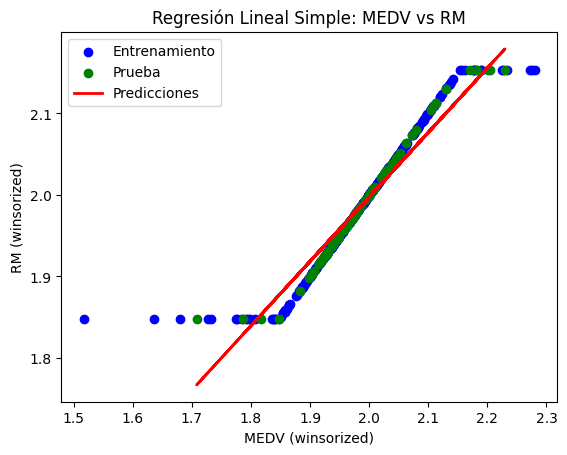

In [68]:
# Creo la variable predictora e independiente con los datos winsorizados, ya que ha dado mejor resultado
X = df_dropped[["log_rm"]]
y = df_dropped["winsorize_medv"]

# Hago la división de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Defino el modelo
modelo = LinearRegression() 

# Entreno el modelo
modelo.fit(X_train, y_train)  

# Realizo las predicciones
predicciones = modelo.predict(X_test)  

#Promedio de error absoluto
mae = mean_absolute_error(y_test, predicciones)

# Coeficiente de determinación

r2 = r2_score(y_test, predicciones)  
# Error cuadrático medio
mse = mean_squared_error(y_test, predicciones)  

# Raiz del error cuadrático medio
rmse = np.sqrt(mean_squared_error(y_test, predicciones))  

# Error en porcentaje
mape = np.mean(np.abs((y_test - predicciones) / y_test)) * 100  

print(f"MAE: {mae:.2f}")
print(f"Coeficiente de determinación (R^2):{r2:.2f}")
print(f"Error cuadrático medio (MSE):{mse:.2f}")
print(f"Raiz de error cuadrático medio (RMSE):{rmse:.2f}")
print(f"Error de porcentaje medio (MAPE):{mape:.2f}")


# Crear un mapa de dispersión para los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento') 

# Crear un mapa de dispersión para los datos de prueba
plt.scatter(X_test, y_test, color='green', label='Prueba')

# Crear la línea de predicción
plt.plot(X_test, predicciones, color='red', linewidth=2, label='Predicciones')

# Añadir etiquetas y título
plt.xlabel("MEDV (winsorized)")
plt.ylabel("RM (winsorized)")
plt.title("Regresión Lineal Simple: MEDV vs RM")

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()